## MNIST Classification by Logistic Regression (LR)
We will be working with the 'hello world' dataset of ML called as MNIST handwritten digits dataset. Each image is a 28 x 28 grayscale digit image, and there are 70000 images. There are 10 classes corresponding to digits 0 - 9. We will only focus on the binary classification problem - to classify if a digit is 5 or not. Our goal is to build a LR model to classify a given handwritten digit into 5 or not.

First let's download the dataset.

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
# What is the type of value of the dictionary key data? what is its shape?
# What is the type of value of the dictionary key target? what is its shape?
# write code to answer the above questions; we will call data as X and target as y

X, y = mnist["data"], mnist["target"]

print(f"X has type {type(X)} and shape {X.shape}.")
print(f"y has type {type(y)} and shape {y.shape}.")

# Answer:
# The type of value of the dictionary key data is class 'pandas.core.frame.DataFrame'
# It's shape is (70000,784)
# The type of value of the dictionary key target is class 'pandas.core.series.Series'
# It's shape is (70000,).

X has type <class 'pandas.core.frame.DataFrame'> and shape (70000, 784).
y has type <class 'pandas.core.series.Series'> and shape (70000,).


As we can see above each image is represented as a row in the dataframe with 784 features. This 784 features are the 784 pixel values in the 28 x 28 image arranged in, for eg., row major order.

In [3]:
import numpy as np

# convert the type of X and y to numpy arrays

X = np.array(X)    # fill your code here
y = np.array(y)    # fill your code here


# print the type of an element of X and an element of y
print(X.dtype, type(y[0]))

# convert type of elements of y to uint8
y = y.astype('uint8')

print(y.dtype)

float64 <class 'str'>
uint8


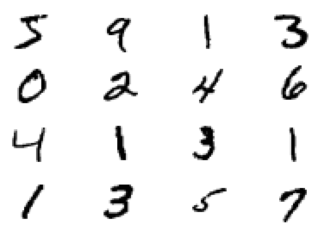

In [4]:
# Display some mnist images. Each image is a row of size 784. Reshape this into 28 x 28 and display.
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(4, 4)
# Display some mnist images. Each image is a row of size 784. Reshape this into 28 x 28 and display.
for i in range(4):
  for j in range(4):
    ax[i][j].imshow(X[i+j*4].reshape(28, 28), cmap="binary")
    ax[i][j].axis("off")



In [5]:
# Repair y so that for digit 5, it is 1 and for others it is 0.

y =[1 if i==5 else 0 for i in y]  # fill your code here
print(y)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 

In [6]:
# Normalize images so that the range is [0, 1]. Ensure range is covered. Use normalize function from skearn.preprocessing
from sklearn.preprocessing import normalize

X = normalize(X,norm= 'max')    #fill your code here


In [7]:
# Instantiate logistic regression model
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression()    # fill your code here

You might have wondered that data split has not yet been done. We said in the previous notes that the split must be done right in the beginning. Yes, we should have done that. But I wanted to introduce another way, called cross-validation (CV), of testing the performance through this notes. That's the reason why we instantiated the model even before we split the data. Let me give the motivation for CV. 

In a random split using 80-20 or 70-30 rule also called hold-out method, it could happen that the test subset contains some information/pattern that is not exhibited in the train set. Then the model will not generalize well on the test data since it has not seen the patterns exhibited in the test data during training. This scenario is possible if the volume of the data is small. In other words, when the volume of data is small, separately keeping a test subset aside would make training set not represent the original population well. Further, when the volume of data is small, different random splittings will produce significantly varying models, which can cause instability. In this case, the model cannot generalize well. So, hold-out is useful only when there is large volume of data.

When the volume of data is small or medium, we can go for k-fold CV. Here, the data is split into k 'almost equal or equal' distinct subsets. Then, on each training subset consisting of union of k-1 subsets selected from the k subsets, an instance of the model is built, which is then tested on the subset that is left out. This way, every sample gets its chance to be a test sample once. k instances of the model are trained, each learning some patterns based on the training set it gets. Across k trained instances, all the patterns gets covered. The average test performance of all of them is the performance of the model. Typically k is 5 or 10 for a medium sized data, but when the volume of data is very small, say some v, then k=v. This latter case is called as leave-one-out CV because the test subset size is 1 during CV.

For very large volume of data, CV will be computationally very expensive. In fact, hold-out will be cheaper and will give similar performance to that of CV's.

Note that CV is not outputting a model as such. It gives performances of various instances of the model we had chosen (for eg. logistic regression model), from which we can obtain the performance of the model through average. It is very useful for comparing models. For eg, for a given problem, we wanted to choose between two models, say logistic regression and random forest. We will obtain the performance of both the models using CV. We choose the one whose performance is better. CV can also be used for finetuing the hyperparameters of a model. 

It is to be noted that when dividing data into subgroups based on k, we can stratify each subgroup based on the class proportion in the given data.

So, from the discussion above, you might again wonder how CV is going to be helpful in this exercise. After all, the data size of 70000 is reasonably large. Isn't it? And further that we are looking at only one model, which is logistic regression. We are not comparing models!! Yes, if that was your stream of thoughts, you are right. But I am introducing CV here for the sake of introduction. Further, 70000 is not very large also. We already know how to use train_test_split from sklearn. Now we will learn about CV. Later, when you study SVM or random forest, you can compare it with logistic regression model you would have developed here using the already learnt CV. That's the idea.

In [8]:
# perform a 5-fold CV and get the accuracies of the trained instances; use 'accuracy' metric for scoring param
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

accuracies = cross_val_score(log_reg,X,y,cv = 5,scoring ='accuracy') # fill your code here

print(accuracies)

[0.97578571 0.97578571 0.97242857 0.97228571 0.97878571]


In [9]:
# find the performance of the model as the average of the above accuracies

acc = accuracies.mean() # fill your code here

print(f"{acc:.3f}")

0.975


In [10]:
# do you think the model is doing well because it is giving 97% accuracy?
# Is the data balanced?
# Write a code to find number of 5's and non-5's in the data
# Your code below
fives = np.count_nonzero(y)
print("Number of Five's : ",fives)
nonfives = len(y) - fives
print("Number of Non-Five's: ",nonfives)

# Answers:
# No. Because, Number of fives and Number of non-fives varies more than 10 times.
# Data is Imbalanced.

Number of Five's :  6313
Number of Non-Five's:  63687


In [11]:

# Since data is imbalanced, overall accuracy is not the right metric. 
# In fact, individual classwise performances  using the confusion matrix
# To use confusion matrix, we first need predictions on the data
# We will use cross_val_predict function for this
from sklearn.model_selection import cross_val_predict

predictions =  cross_val_predict(log_reg, X, y, cv=5 ) # fill your code here


Text(0.5, 257.44, 'Predicted label')

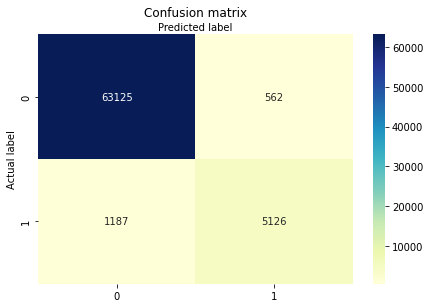

In [12]:
# plot confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

C = confusion_matrix( y,predictions) # fill your code here

fig, ax = plt.subplots()
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(C), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The entries are absolute numbers. We will normalize every entry by dividing by its row sum to get classwise performances (diagonal entries) and the misclassification rates (off-diagonal entries).

Text(0.5, 257.44, 'Predicted label')

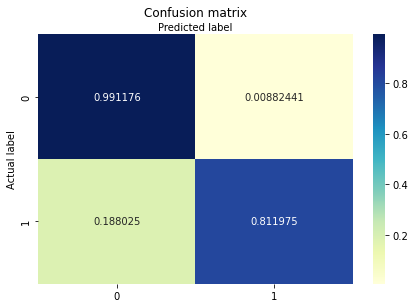

In [13]:
# normalize confusion matrix entries by row sum

C_normalized = confusion_matrix(y, predictions, normalize= 'true') # fill your code here


fig, ax = plt.subplots()
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(C_normalized), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

As you can see, even though the overall accuracy was 97, the TPR or sensitivity or recall w.r.to '5' class is only (81.19%) indicating that the classifier is relatively freely assigning samples to non-5 class. Let us get precision and F-measure also, directly as we had already seen in the theory notes.

In [14]:
# get precision, recall and F-measure
from sklearn.metrics import precision_score, recall_score, f1_score

prec_score = precision_score( y, predictions)  # fill your code here
recall_score = recall_score( y, predictions)  # fill your code here
f_measure = f1_score( y, predictions)  # fill your code here

print('Precision: {:.3f}'.format(prec_score))
print('Recall: {:.3f}'.format(recall_score))
print('f1_score: {:.3f}'.format(f_measure))

Precision: 0.901
Recall: 0.812
f1_score: 0.854


We will plot the precision-recall curve to understand the trade-off between precision and recall. Note that the way classifier chooses a sample to be positive or negative is based on class probability. If the class probability is greater than the default probbaility threshold 0.5 for a sample then it is positive; else negative. So, to plot precision-recall curve, let us first get the class probabilities for each sample instead of predictions.

In [15]:
# get class probabilities for each sample using cross_val_predict function where for the method argument,
# supply 'predict_proba'
# the function will return a 70000 x 2 matrix where first column corresponds to class 0 probabilities
# and the other column corresponds to class 1 probabilities

probs = cross_val_predict( log_reg, X,y, method="predict_proba", cv=5) # fill your code here
print(probs)

[[1.12595670e-01 8.87404330e-01]
 [9.99693220e-01 3.06779852e-04]
 [9.99995608e-01 4.39220354e-06]
 ...
 [9.96305069e-01 3.69493086e-03]
 [5.10263247e-03 9.94897368e-01]
 [9.99901949e-01 9.80509478e-05]]


In [16]:
# we will consider only positive class probabilities
positive_probs = probs[:,1] # fill your code here
print(positive_probs)

[8.87404330e-01 3.06779852e-04 4.39220354e-06 ... 3.69493086e-03
 9.94897368e-01 9.80509478e-05]


In [17]:
# Now get precisions and recalls for each of the probability in probs as threshold
# for this we will use precision_recall_curve function
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds =  precision_recall_curve( y, positive_probs) # fill your code here


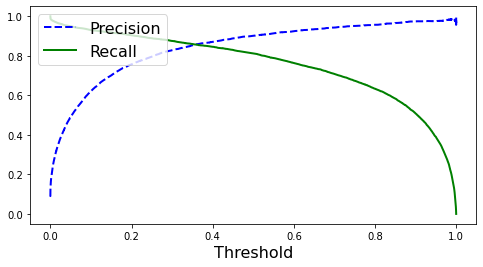

In [18]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)


It's clear that if we try to increase recall, precision goes down and vice-versa. If we are interested in more precisely detecting 5, we could even set probability threshold to 0.6. Note that this probability threshold is not a controllable parameter of the logistic regression model. After analysis as above, you have to manually use a threshold of your interest for predictions. Do this in the code below.

In [19]:
# Write code below to compute the precision at probability threshold 0.6
operating_point_index = np.where(np.isclose(np.around(thresholds, decimals=2), 0.6) == True)[0][0]
precisions[operating_point_index]

0.9226951708341287

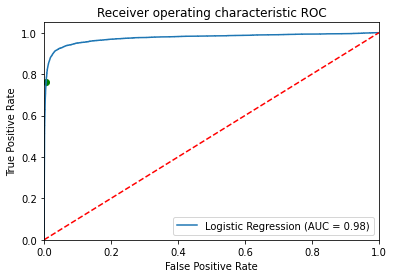

In [20]:
# Write code below to display ROC curve and to compute AUC; print the AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# ROC curve
logit_roc_auc = roc_auc_score(y,positive_probs)
fpr, tpr, thresholds = roc_curve(y,positive_probs)

#visualize ROC curve
operating_point_index = np.where(np.isclose(np.around(thresholds, decimals=2), 0.6) == True)[0][0]
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.scatter(fpr[operating_point_index], tpr[operating_point_index], c="green")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ROC')
plt.legend(loc="lower right")


Generally, when the positive class is rare, precision-recall curve is preferred over ROC curve. Otherwise, ROC curve is fine. AUC can be used to compare classifiers/models in case of hold-out train-test split. The one with the highest  

